In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
import statistics as st

In [3]:
data = pd.read_csv("../dataset/dataset_clean.csv")

In [4]:
data=data.drop(columns='Index')
data.head(10)

,Delivery_person_Age,Delivery_person_ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_order,Time_order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,Multiple_deliveries,Festival,City,Distance,Time_taken_(min)
0,36.0,4.5,23.351058,85.325731,23.371058,85.345731,2022-03-24 11:25:00,2022-03-24 11:35:00,Cloudy,High,1,Drinks,motorcycle,1.0,No,Metropolitian,3.018911,25.0
1,37.0,4.7,12.934365,77.616155,13.024365,77.706155,2022-03-25 17:40:00,2022-03-25 17:50:00,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,13.973178,40.0
2,25.0,4.9,22.312790,73.170283,22.352790,73.210283,2022-03-19 13:40:00,2022-03-19 13:55:00,Cloudy,High,1,Drinks,scooter,1.0,No,Urban,6.058825,30.0
3,28.0,4.5,17.433809,78.386744,17.563809,78.516744,2022-03-10 23:35:00,2022-03-10 23:45:00,Sandstorms,Low,1,Drinks,motorcycle,1.0,No,Metropolitian,19.975520,11.0
4,22.0,4.5,12.310972,76.659264,12.390972,76.739264,2022-03-10 20:40:00,2022-03-10 20:55:00,Fog,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,12.435540,47.0
5,37.0,4.8,19.091458,72.827808,19.101458,72.837808,2022-04-03 10:45:00,2022-04-03 10:50:00,Sunny,Low,1,Meal,scooter,1.0,No,Urban,1.529877,19.0
6,21.0,4.8,23.234249,77.434007,23.244249,77.444007,2022-02-15 09:40:00,2022-02-15 09:45:00,Windy,Low,1,Snack,scooter,1.0,No,Metropolitian,1.510088,15.0
7,35.0,4.2,15.303897,73.914336,15.323897,73.934336,2022-02-13 08:30:00,2022-02-13 08:35:00,Windy,Low,0,Snack,motorcycle,1.0,No,Metropolitian,3.089737,31.0
8,34.0,4.5,22.514688,88.393294,22.564688,88.443294,2022-02-11 18:35:00,2022-02-11 18:40:00,Fog,Medium,2,Drinks,electric_scooter,1.0,No,Urban,7.568330,18.0
9,22.0,5.0,26.911927,75.797282,26.931927,75.817282,2022-04-01 08:20:00,2022-04-01 08:35:00,Fog,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,2.979521,20.0


In [5]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in data.columns:
    print('{} : {}'.format(col,data[col].unique()))

Delivery_person_Age : [36. 37. 25. 28. 22. 21. 35. 34. 39. 33. 38. 27. 26. 31. 30. 32. 29. 24.
 23. 20. 15.]
Delivery_person_ratings : [4.5 4.7 4.9 4.8 4.2 5.  4.6 4.4 3.7 3.8 4.  4.3 4.1 3.9 3.6 3.5 2.9 3.3
 2.6 3.2 1.  2.5 3.4 3.1 2.7 2.8 3. ]
Restaurant_latitude : [23.351058 12.934365 22.31279  17.433809 12.310972 19.091458 23.234249
 15.303897 22.514688 26.911927 13.064181 22.753659  0.       19.874449
 22.308096 12.284747 13.049645 19.131141 22.761226 26.892312 27.160934
 11.006686 17.431477 13.045479 26.47775  17.422819 26.492106 21.173343
 22.727021 22.725748 23.357804 23.353783 18.530963 22.552996 12.914264
 21.170798 12.972532 15.496162 11.024839 22.311358 22.311603 26.473698
 26.90519  17.45971  19.055831 22.75004  26.471617 11.022169 23.371292
 12.323194 22.751857 19.003517 17.430448 12.352058  9.985497 19.221315
 13.091809 22.539129 13.086438 18.994049 12.334022 13.026286 22.307898
 10.96185   9.982834 21.157729 22.761593 26.463504 26.913483 12.299524
 12.972793 23.39925  1

In [6]:
# Examine numerical features in the dataset
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Delivery_person_Age', 'Delivery_person_ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'Multiple_deliveries', 'Distance', 'Time_taken_(min)'],
      dtype='object')

In [7]:
# Examine categorical features in the dataset
categorical_features = data.select_dtypes(include=[object])
categorical_features.columns

Index(['Time_order', 'Time_order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival',
       'City'],
      dtype='object')

In [8]:
import sweetviz as sv
analyze_report = sv.analyze(data)
analyze_report.show_html('analyze_dataset_clean.html', open_browser=True)

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result

Report analyze_dataset_clean.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Descriptive statistics (Thống kê mô tả)

Central tendencies (Hướng trung tâm):

In [9]:
#  Get various summary statistics that exclude NaN values
data[numeric_features.columns].describe()

,Delivery_person_Age,Delivery_person_ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,Multiple_deliveries,Distance,Time_taken_(min)
count,44657.000000,44657.000000,44657.000000,44657.000000,44657.000000,44657.000000,44657.000000,44657.000000,44657.000000,44657.000000
mean,29.429429,4.626766,17.379495,70.721008,17.443124,70.784637,1.001881,1.059364,9.738059,26.301207
std,5.743174,0.324823,7.340099,21.191989,7.341452,21.192164,0.817801,0.267425,5.606683,9.379678
min,15.000000,1.000000,0.000000,0.000000,0.010000,0.010000,0.000000,1.000000,1.465067,10.000000
25%,25.000000,4.500000,12.934179,73.170283,12.985996,73.275081,0.000000,1.000000,4.663419,19.000000
50%,29.000000,4.700000,18.554382,75.898497,18.632450,75.997648,1.000000,1.000000,9.220317,26.000000
75%,34.000000,4.800000,22.732225,78.045359,22.783839,78.101544,2.000000,1.000000,13.681492,32.000000
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,20.969489,54.000000


In [10]:
print("Calculate mode value of features:")
for feature in data.columns:
    mode=st.mode(data[feature])
    print(f'{feature}:', mode)

Calculate mode value of features:
Delivery_person_Age: 25.0
Delivery_person_ratings: 4.8
Restaurant_latitude: 0.0
Restaurant_longitude: 0.0
Delivery_location_latitude: 0.13
Delivery_location_longitude: 0.13
Time_order: 2022-03-20 20:15:00
Time_order_picked: 2022-03-29 23:55:00
Weather_conditions: Fog
Road_traffic_density: Low
Vehicle_condition: 1
Type_of_order: Snack
Type_of_vehicle: motorcycle
Multiple_deliveries: 1.0
Festival: No
City: Metropolitian
Distance: 20.442929762531403
Time_taken_(min): 26.0


In [11]:
print("Calculate median value of numerical features:")
for feature in numeric_features.columns:
    print(f'{feature}:', data[feature].median())

Calculate median value of numerical features:
Delivery_person_Age: 29.0
Delivery_person_ratings: 4.7
Restaurant_latitude: 18.554382
Restaurant_longitude: 75.898497
Delivery_location_latitude: 18.63245
Delivery_location_longitude: 75.997648
Vehicle_condition: 1.0
Multiple_deliveries: 1.0
Distance: 9.220316821861015
Time_taken_(min): 26.0


In [12]:
print("Calculate mean value of numerical features:")
for feature in numeric_features.columns:
    print(f'{feature}:', data[feature].mean())

Calculate mean value of numerical features:
Delivery_person_Age: 29.42942875696979
Delivery_person_ratings: 4.626766240455025
Restaurant_latitude: 17.379494943457914
Restaurant_longitude: 70.72100801365968
Delivery_location_latitude: 17.4431239403453
Delivery_location_longitude: 70.78463700936024
Vehicle_condition: 1.0018810040979018
Multiple_deliveries: 1.0593635936135433
Distance: 9.73805944531364
Time_taken_(min): 26.301206977629487


Dispersion (Độ phân tán):

In [13]:
print("Standard deviation (Độ lệch chuẩn):")
data.std(numeric_only=True)

Standard deviation (Độ lệch chuẩn):


Delivery_person_Age             5.743174
Delivery_person_ratings         0.324823
Restaurant_latitude             7.340099
Restaurant_longitude           21.191989
Delivery_location_latitude      7.341452
Delivery_location_longitude    21.192164
Vehicle_condition               0.817801
Multiple_deliveries             0.267425
Distance                        5.606683
Time_taken_(min)                9.379678
dtype: float64

In [14]:
print("Variance (Phương sai):")
data.var(numeric_only=True)

Variance (Phương sai):


Delivery_person_Age             32.984052
Delivery_person_ratings          0.105510
Restaurant_latitude             53.877050
Restaurant_longitude           449.100400
Delivery_location_latitude      53.896913
Delivery_location_longitude    449.107821
Vehicle_condition                0.668798
Multiple_deliveries              0.071516
Distance                        31.434894
Time_taken_(min)                87.978356
dtype: float64

In [15]:
numeric_features.columns

Index(['Delivery_person_Age', 'Delivery_person_ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'Multiple_deliveries', 'Distance', 'Time_taken_(min)'],
      dtype='object')

# Shape of data

In [16]:
data.skew(numeric_only=True)

Delivery_person_Age            0.028368
Delivery_person_ratings       -2.384411
Restaurant_latitude           -0.703126
Restaurant_longitude          -2.942342
Delivery_location_latitude    -0.702304
Delivery_location_longitude   -2.942333
Vehicle_condition              0.004400
Multiple_deliveries            4.886200
Distance                       0.322994
Time_taken_(min)               0.484307
dtype: float64

/tmp/ipykernel_5362/2401849670.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.skew(numeric_only=True), color='blue',axlabel ='Skewness')


<AxesSubplot: xlabel='Skewness', ylabel='Density'>

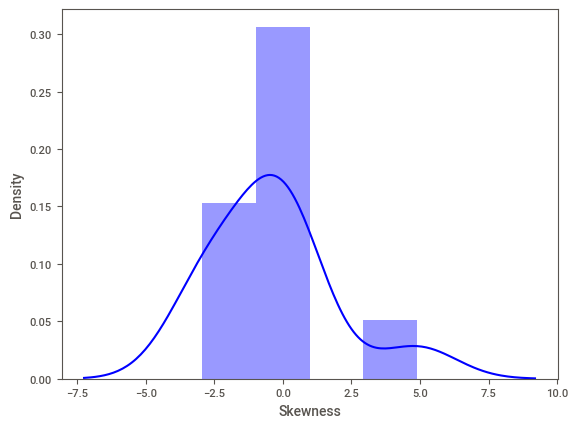

In [17]:
sns.distplot(data.skew(numeric_only=True), color='blue',axlabel ='Skewness')

In [18]:
data.kurt(numeric_only=True)

Delivery_person_Age            -1.196966
Delivery_person_ratings        13.496928
Restaurant_latitude             0.260928
Restaurant_longitude            7.013854
Delivery_location_latitude      0.260195
Delivery_location_longitude     7.013812
Vehicle_condition              -1.485618
Multiple_deliveries            25.428123
Distance                       -0.904754
Time_taken_(min)               -0.312862
dtype: float64

/tmp/ipykernel_5362/3121433695.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.kurt(numeric_only=True),color='red',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)


<AxesSubplot: xlabel='Kurtosis', ylabel='Density'>

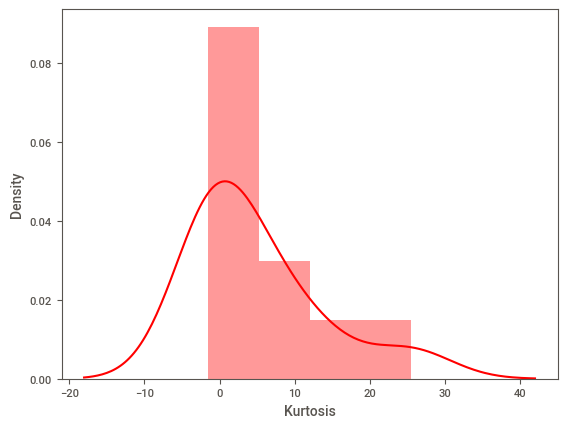

In [19]:
sns.distplot(data.kurt(numeric_only=True),color='red',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)

# Correlation

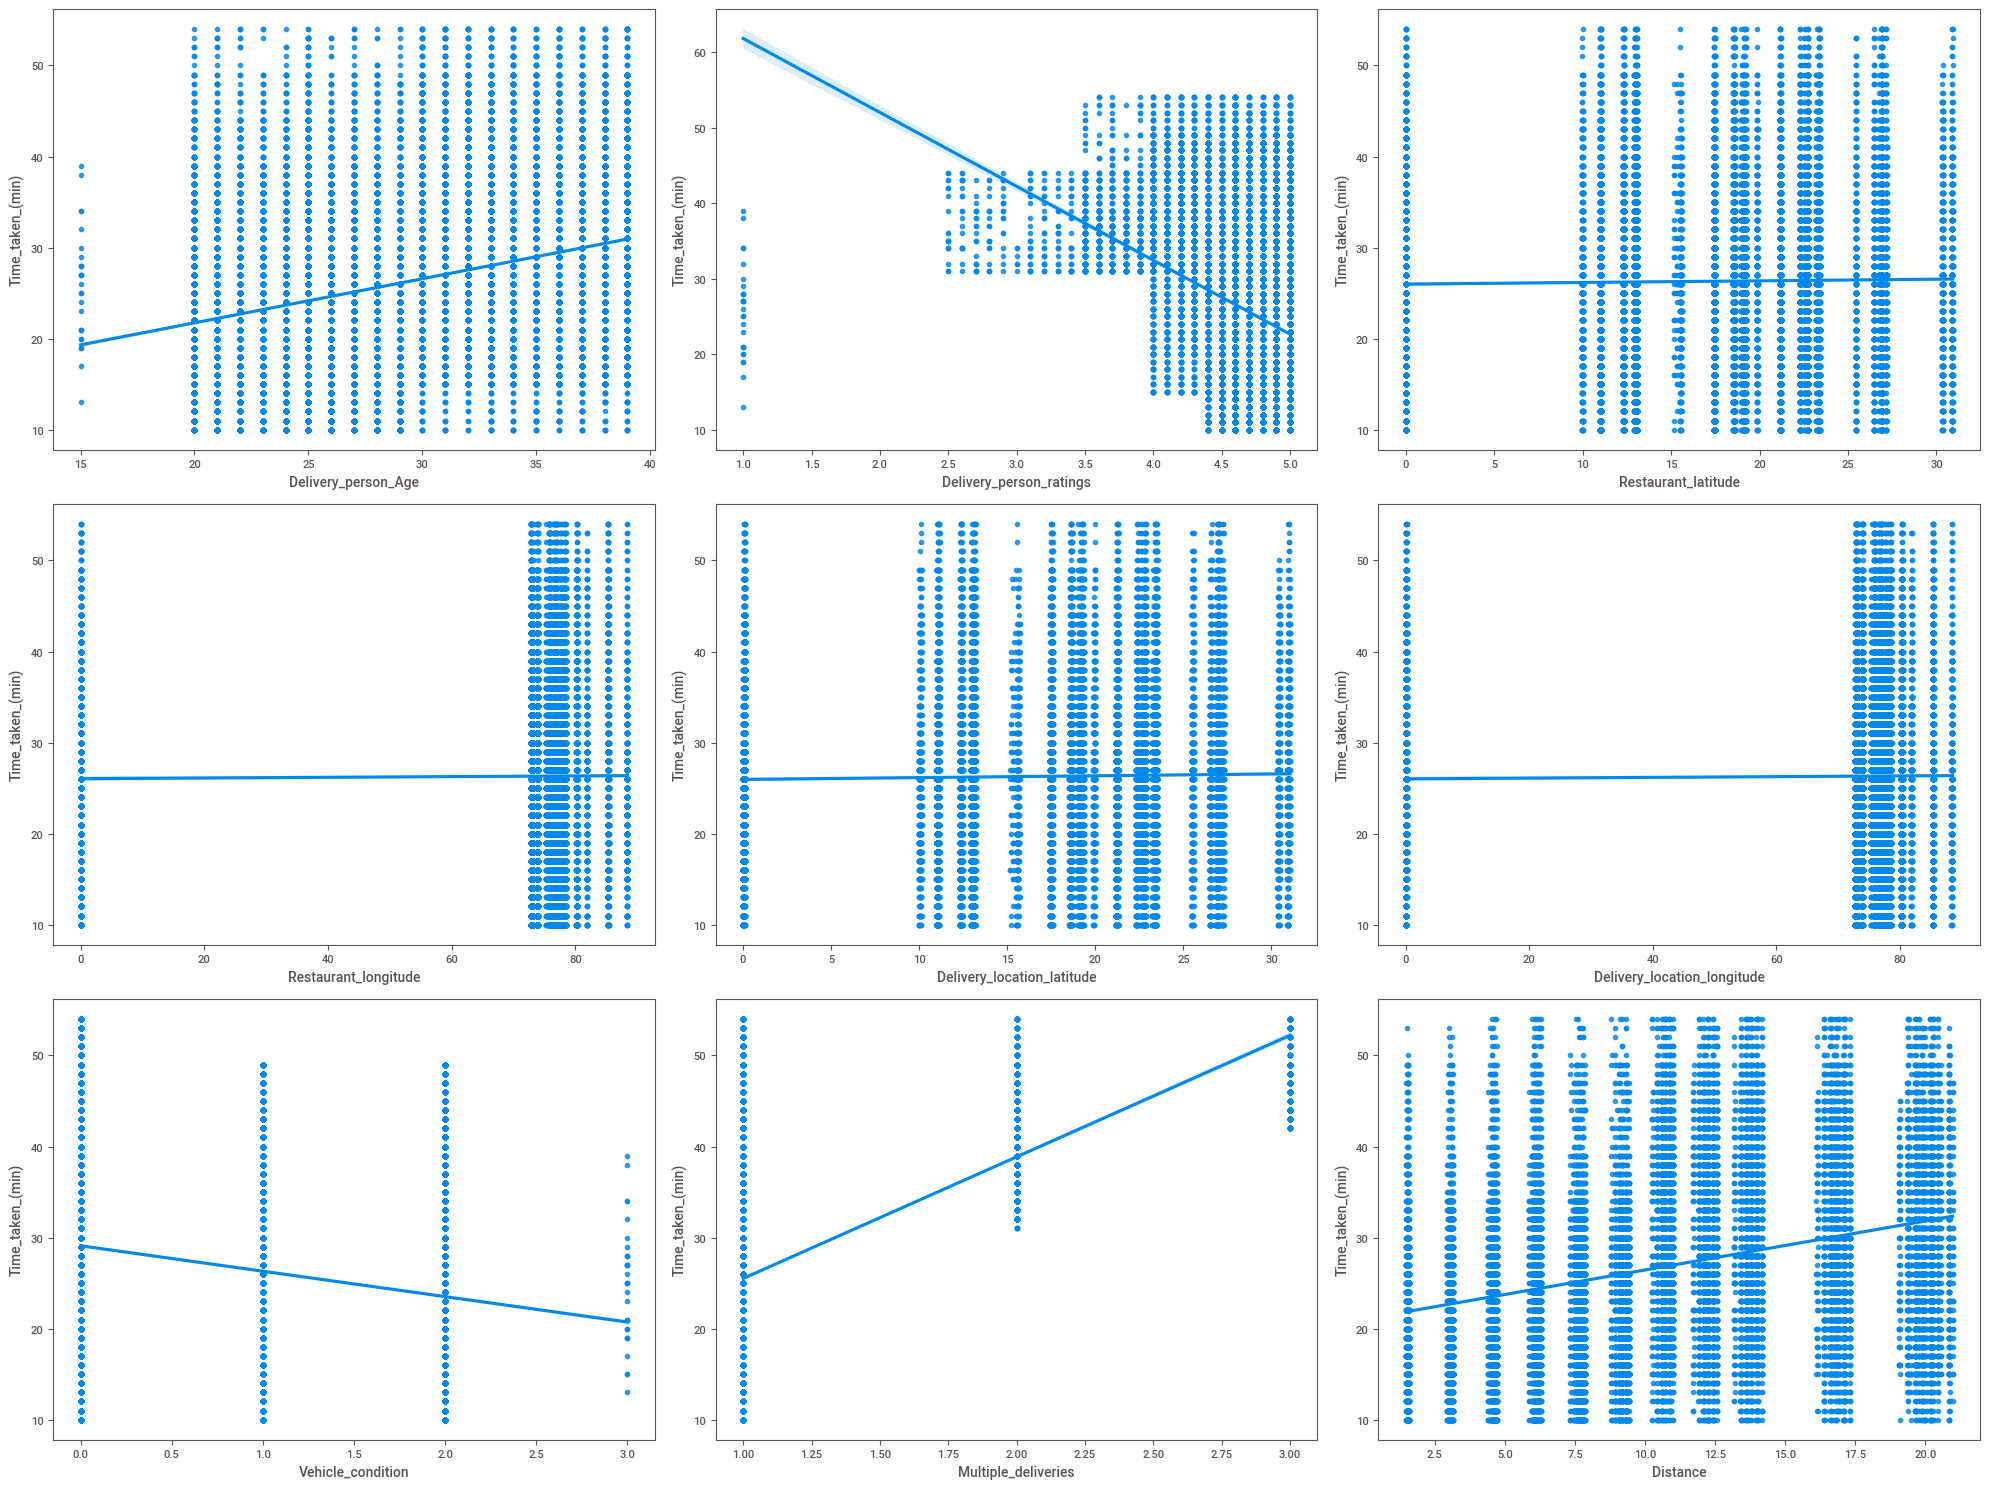

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

sns.regplot(x=data["Delivery_person_Age"], y=data["Time_taken_(min)"], ax=axes[0,0])
sns.regplot(x=data["Delivery_person_ratings"], y=data["Time_taken_(min)"], ax=axes[0,1])
sns.regplot(x=data["Restaurant_latitude"], y=data["Time_taken_(min)"], ax=axes[0,2])
sns.regplot(x=data["Restaurant_longitude"], y=data["Time_taken_(min)"], ax=axes[1,0])
sns.regplot(x=data["Delivery_location_latitude"], y=data["Time_taken_(min)"], ax=axes[1,1])
sns.regplot(x=data["Delivery_location_longitude"], y=data["Time_taken_(min)"], ax=axes[1,2])
sns.regplot(x=data["Vehicle_condition"], y=data["Time_taken_(min)"], ax=axes[2,0])
sns.regplot(x=data["Multiple_deliveries"], y=data["Time_taken_(min)"], ax=axes[2,1])
sns.regplot(x=data["Distance"], y=data["Time_taken_(min)"], ax=axes[2,2])
plt.tight_layout()
plt.show()

<AxesSubplot: title={'center': 'Correlation of Features with Time Taken'}>

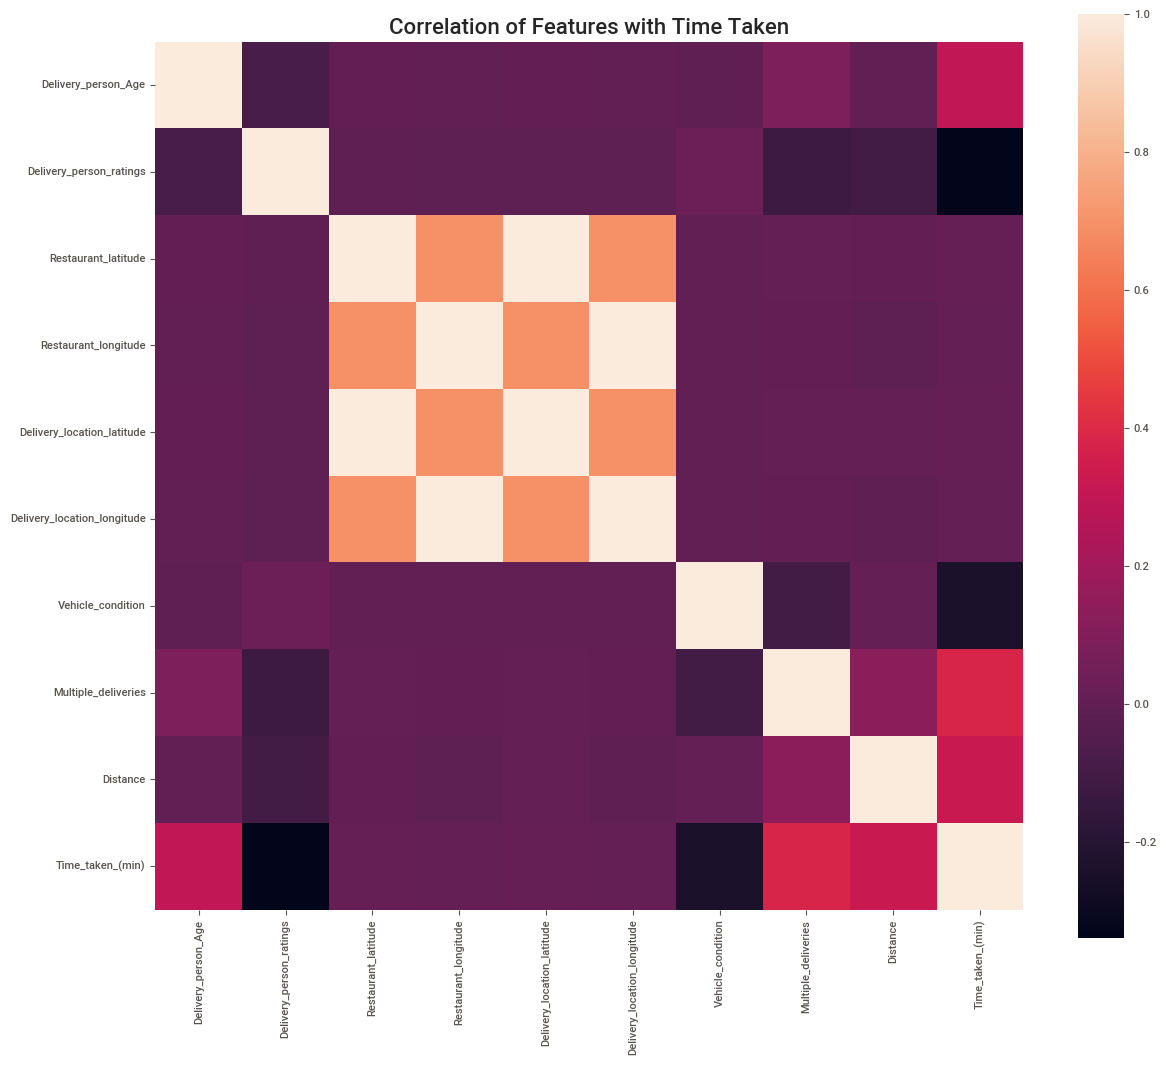

In [21]:
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Features with Time Taken',y=1,size=16)
sns.heatmap(data.corr(numeric_only=True),square = True,  vmax=1)

In [22]:
correlation = numeric_features.corr()
print(correlation['Time_taken_(min)'].sort_values(ascending = False),'\n')

Time_taken_(min)               1.000000
Multiple_deliveries            0.380700
Distance                       0.321647
Delivery_person_Age            0.296540
Delivery_location_latitude     0.015676
Restaurant_latitude            0.014070
Delivery_location_longitude    0.009011
Restaurant_longitude           0.008454
Vehicle_condition             -0.243433
Delivery_person_ratings       -0.338986
Name: Time_taken_(min), dtype: float64 



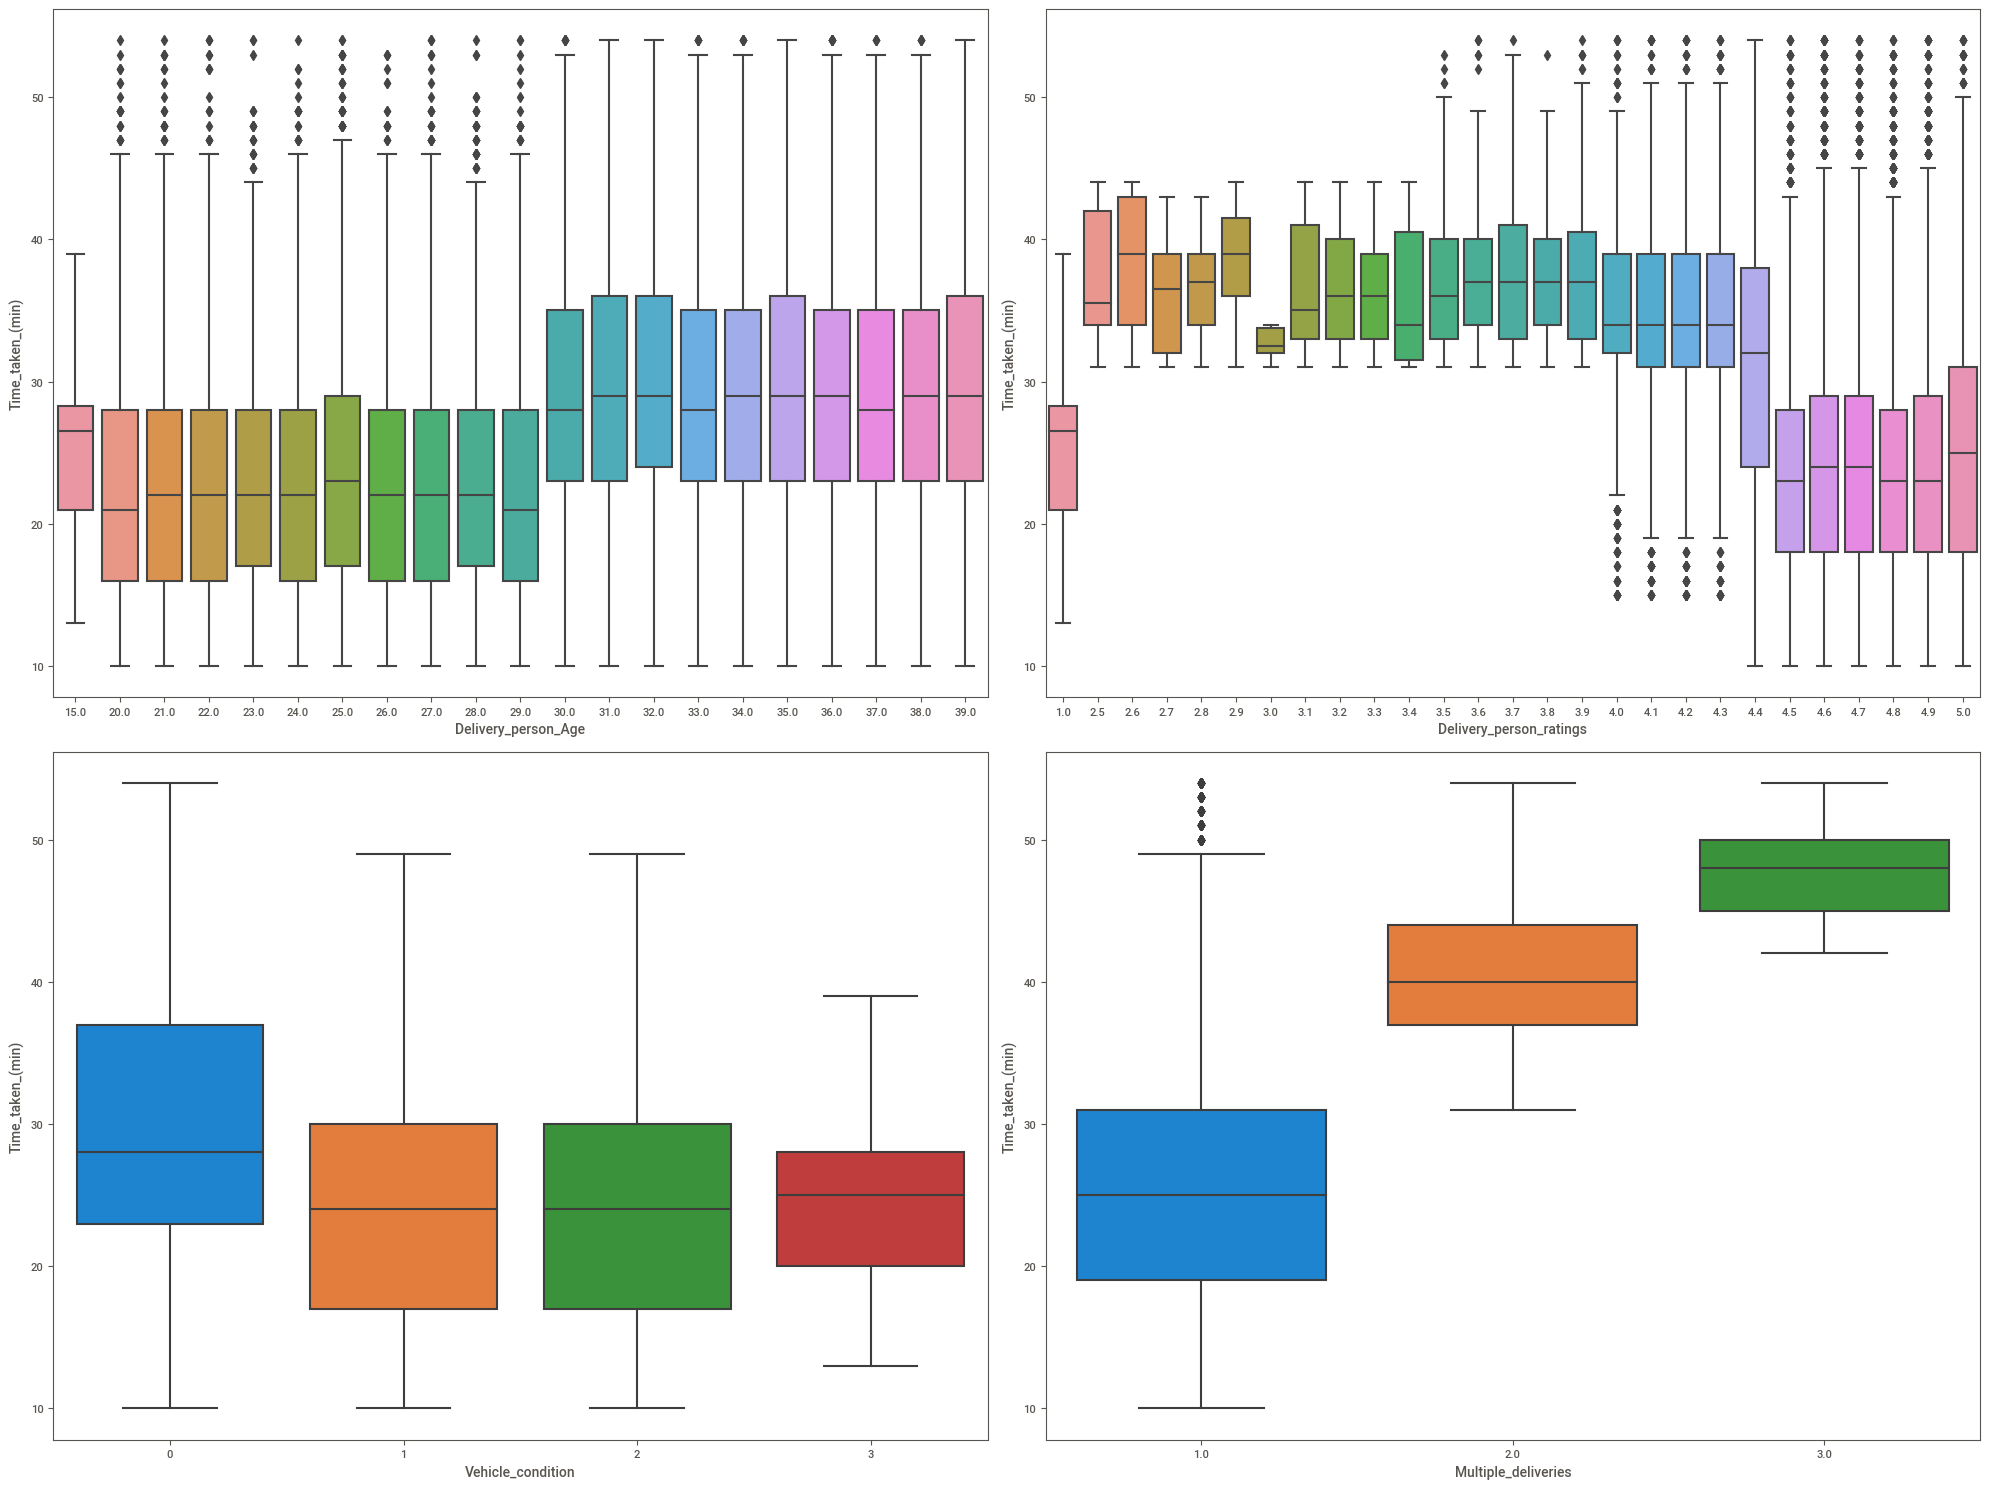

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
sns.boxplot(x="Delivery_person_Age", y="Time_taken_(min)", data=data, ax=axes[0,0])
sns.boxplot(x="Delivery_person_ratings", y="Time_taken_(min)", data=data, ax=axes[0,1])
sns.boxplot(x="Vehicle_condition", y="Time_taken_(min)", data=data, ax=axes[1,0])
sns.boxplot(x="Multiple_deliveries", y="Time_taken_(min)", data=data, ax=axes[1,1])
plt.tight_layout()
plt.show()

In [24]:
categorical_features.columns

Index(['Time_order', 'Time_order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival',
       'City'],
      dtype='object')

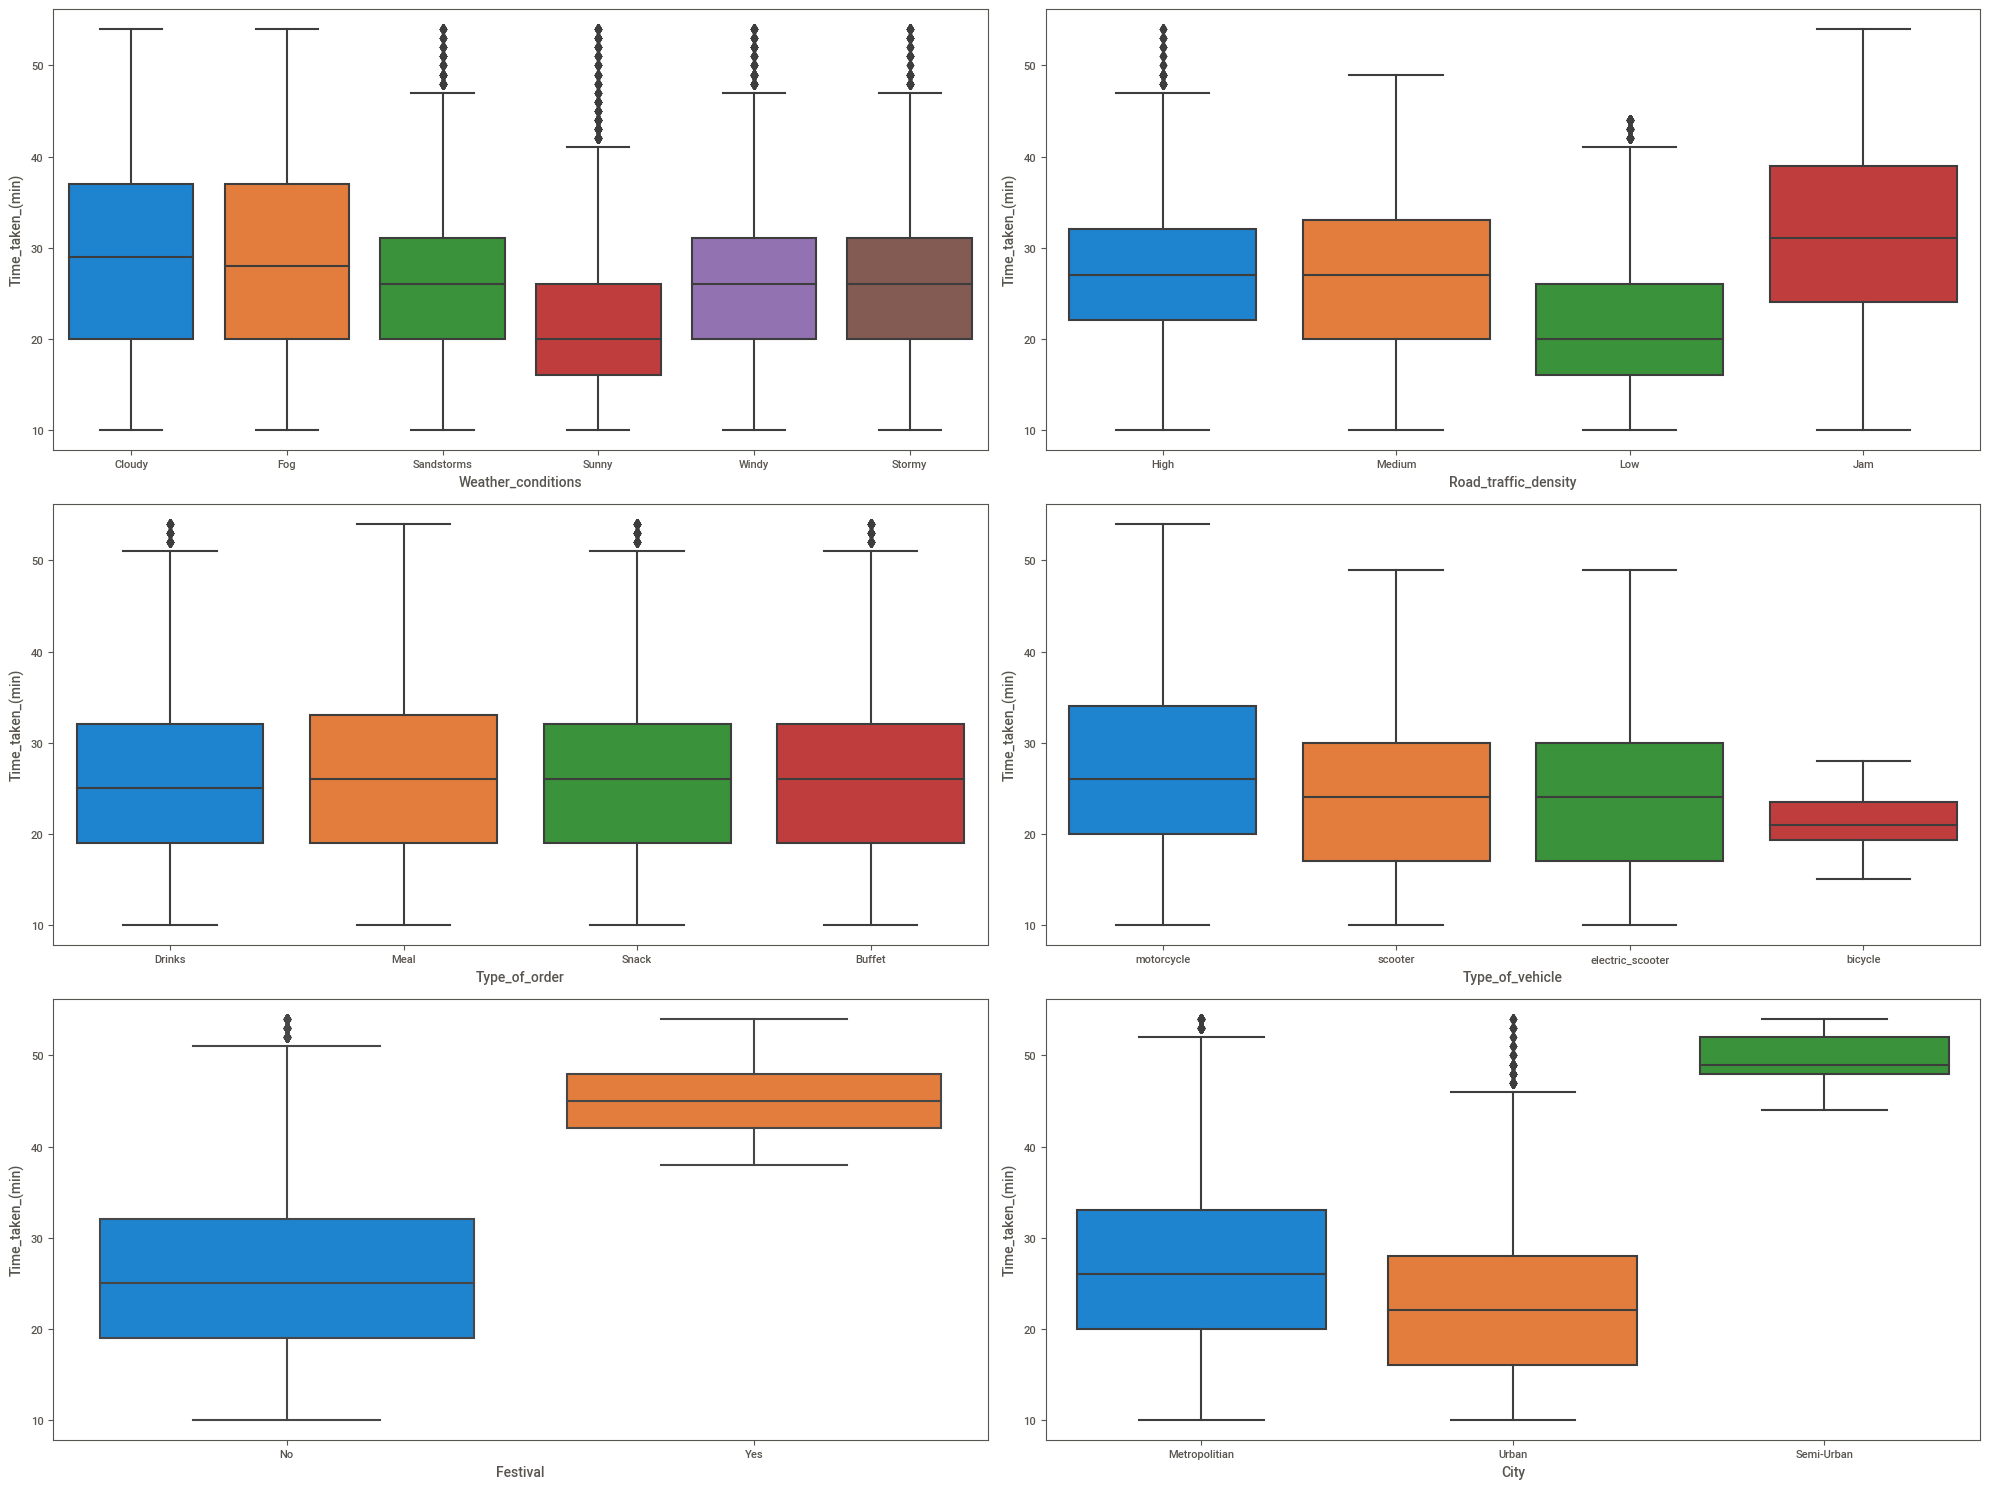

In [25]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
sns.boxplot(x="Weather_conditions", y="Time_taken_(min)", data=data, ax=axes[0,0])
sns.boxplot(x="Road_traffic_density", y="Time_taken_(min)", data=data, ax=axes[0,1])
sns.boxplot(x="Type_of_order", y="Time_taken_(min)", data=data, ax=axes[1,0])
sns.boxplot(x="Type_of_vehicle", y="Time_taken_(min)", data=data, ax=axes[1,1])
sns.boxplot(x="Festival", y="Time_taken_(min)", data=data, ax=axes[2,0])
sns.boxplot(x="City", y="Time_taken_(min)", data=data, ax=axes[2,1])
plt.tight_layout()
plt.show()

# Group By

In [26]:
categorical_features.columns

Index(['Time_order', 'Time_order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival',
       'City'],
      dtype='object')

In [27]:
data_gb = data[["Road_traffic_density", "Type_of_order","Time_taken_(min)"]]
data_groupby = data_gb.groupby(["Road_traffic_density", "Type_of_order"], as_index=False).mean()

data_groupby

,Road_traffic_density,Type_of_order,Time_taken_(min)
0,High,Buffet,27.058981
1,High,Drinks,27.426214
2,High,Meal,27.323187
3,High,Snack,27.126761
4,Jam,Buffet,31.442130
5,Jam,Drinks,30.843867
6,Jam,Meal,31.132883
7,Jam,Snack,31.269156
8,Low,Buffet,21.229858
9,Low,Drinks,21.211082


In [28]:
data_pivot = data_groupby.pivot(index="Road_traffic_density", columns="Type_of_order")
data_pivot

Time_taken_(min)                                 
Type_of_order                  Buffet     Drinks       Meal      Snack
Road_traffic_density                                                  
High                        27.058981  27.426214  27.323187  27.126761
Jam                         31.442130  30.843867  31.132883  31.269156
Low                         21.229858  21.211082  21.481036  21.177041
Medium                      26.545861  26.718931  26.914444  26.669728

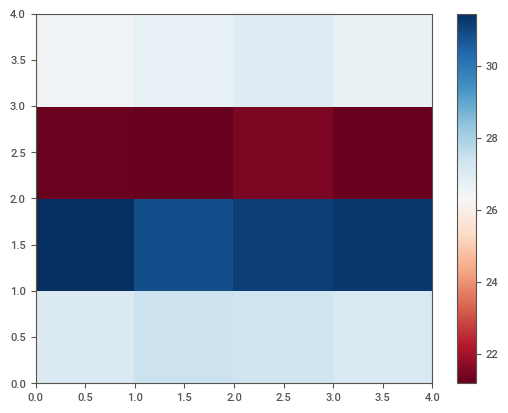

In [29]:
plt.pcolor(data_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

# Phân tích ANOVA

In [30]:
categorical_features.columns

Index(['Time_order', 'Time_order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival',
       'City'],
      dtype='object')

In [60]:
data_anova = data[["Festival","Time_taken_(min)"]]
grouped_anova = data_anova.groupby(['Festival'])
anova_result = stats.f_oneway(grouped_anova.get_group('Yes')['Time_taken_(min)'],
                              grouped_anova.get_group('No')['Time_taken_(min)'],)
anova_result

F_onewayResult(statistic=4059.00373463484, pvalue=0.0)

In [61]:
data_anova = data[["City","Time_taken_(min)"]]
grouped_anova = data_anova.groupby(['City'])
anova_result = stats.f_oneway(grouped_anova.get_group('Urban')['Time_taken_(min)'],
                              grouped_anova.get_group('Metropolitian')['Time_taken_(min)'],
                              grouped_anova.get_group('Semi-Urban')['Time_taken_(min)'])
anova_result

F_onewayResult(statistic=1337.5320223474816, pvalue=0.0)

In [62]:
data_anova = data[["Type_of_order","Time_taken_(min)"]]
grouped_anova = data_anova.groupby(['Type_of_order'])
anova_result = stats.f_oneway(grouped_anova.get_group('Buffet')['Time_taken_(min)'],
                              grouped_anova.get_group('Snack')['Time_taken_(min)'],
                              grouped_anova.get_group('Drinks')['Time_taken_(min)'],
                              grouped_anova.get_group('Meal')['Time_taken_(min)'])
anova_result

F_onewayResult(statistic=1.3062719506886538, pvalue=0.2703793032586125)

In [63]:
data_anova = data[["Weather_conditions","Time_taken_(min)"]]
grouped_anova = data_anova.groupby(['Weather_conditions'])
anova_result = stats.f_oneway(grouped_anova.get_group('Fog')['Time_taken_(min)'],
                              grouped_anova.get_group('Cloudy')['Time_taken_(min)'],
                              grouped_anova.get_group('Sandstorms')['Time_taken_(min)'],
                              grouped_anova.get_group('Sunny')['Time_taken_(min)'],
                              grouped_anova.get_group('Windy')['Time_taken_(min)'],
                              grouped_anova.get_group('Stormy')['Time_taken_(min)'])
anova_result

F_onewayResult(statistic=605.4055857431629, pvalue=0.0)

In [64]:
data_anova = data[["Type_of_vehicle","Time_taken_(min)"]]
grouped_anova = data_anova.groupby(['Type_of_vehicle'])
anova_result = stats.f_oneway(grouped_anova.get_group('bicycle')['Time_taken_(min)'],
                              grouped_anova.get_group('scooter')['Time_taken_(min)'],
                              grouped_anova.get_group('motorcycle')['Time_taken_(min)'],
                              grouped_anova.get_group('electric_scooter')['Time_taken_(min)'])
anova_result

F_onewayResult(statistic=420.7670403861351, pvalue=1.3946575883406692e-269)

In [65]:
data_anova = data[["Road_traffic_density","Time_taken_(min)"]]
grouped_anova = data_anova.groupby(['Road_traffic_density'])
anova_result = stats.f_oneway(grouped_anova.get_group('Jam')['Time_taken_(min)'],
                              grouped_anova.get_group('Medium')['Time_taken_(min)'],
                              grouped_anova.get_group('High')['Time_taken_(min)'],
                              grouped_anova.get_group('Low')['Time_taken_(min)'])
anova_result

F_onewayResult(statistic=3378.194042107761, pvalue=0.0)

# Features Selection:
    * Numerical feature:
        Multiple_deliveries
        Distance
        Delivery_person_Age
    * Categorical feature:
        Festival
        Road_traffic_density